## Here we will set up the simple model without the clouds first

In [1]:
import context
from Integrator_Functions import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
from Additional_Functions import create_interp_T, create_interp_solar, create_interp_albedo, temp_ave

class Integ71(Integrator):
    def set_yinit(self):

        ## Set up the latitude array:
        latitudes = np.arange(0, 91, 1)
            
        # Set up the needed constants for the derivation
        solar_arr = create_interp_solar(latitudes)
        albedo_arr = create_interp_albedo(latitudes)
        constants = namedtuple('constants', ['solar', 'albedo'])
        self.initvars = constants(solar_arr, albedo_arr)

        ## Set up the initial temperature array
        interp_temp = create_interp_T(latitudes)
        self.yinit = interp_temp

        # Set the integrator to array of length 91
        self.nvars = 91
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """arrs.solar=solar insolation
           arrs.albedo=albedo


           returns dT/dt
        """
        ## derivtive is dT/dt = (1/cp)*[(1-arrs.albedo)*arrs.solar - A - B*Temp - F*(Temp-Tavg)]
        As = 315
        Bs = 4.6
        cp = 2.08e8
        F = 3.8
        Tavg = temp_ave(y)
        Temp = y[0]
        arrs = self.initvars
        f = (1/cp)*((1-arrs.albedo)*arrs.solar - As - Bs*Temp - F*(Temp-Tavg) + 8.5)
        return f
    

******************************
context imported. Front of path:
C:\Users\13432\Documents\ATSC_409\numeric_2024
back of path: C:\Users\13432\miniconda3\envs\numeric_2024\Lib\site-packages\Pythonwin
******************************

through C:\Users\13432\Documents\ATSC_409\numeric_2024\Project\ATSC409\context.py


In [2]:
## This cell will be used to set up the class we will need to override the derivs function
## Used for testing the integrator atm

theSolver = Integ71('init_conds_simple.yaml')
timeVals, yVals, errorList = theSolver.timeloop5Err()

17.203948011887487
17.203947997296012
17.203947990000277
17.203947968113063
17.203947938930114
17.203947948049787
17.203947938930114
17.20394786597275
17.203947829494062
17.203947720058014
17.203947574143278
17.203947619741637
17.203947574143278
17.203947209356443
17.203947026963025
17.20394647978277
17.2039457502091
17.20394597820087
17.2039457502091
17.20394392627492
17.20394301430784
17.203940278406606
17.203936630538323
17.203937770497156
17.203936630538323
17.203927510867665
17.2039229510326
17.203909271527408
17.203891032187975
17.203896731981448
17.203891032187975
17.203845433840563
17.20382263467347
17.2037542371722
17.203663040524408
17.203691539474317
17.203663040524408
17.203435048934335
17.203321053304638
17.202979066415555
17.202523084411194
17.2026655787244
17.202523084411187
17.201383130135103
17.200813157130586
17.199103238116162
17.196823358956923
17.19753581961529
17.19682335895613
17.191123679423768
17.18827394297772
17.179724733532456
17.168326109064466
17.171888139

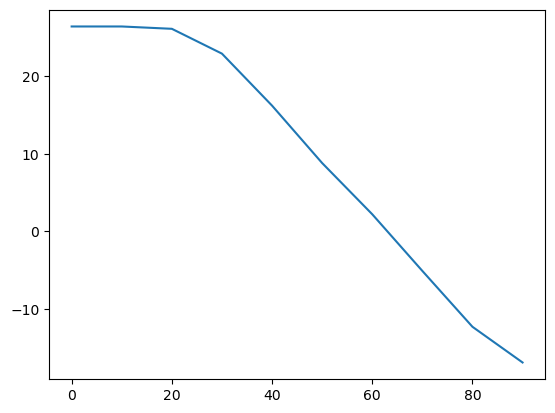

In [3]:
initial = yVals[0]
end = yVals[-1]
lat = np.arange(0, 91, 1)

plt.plot(lat, initial)

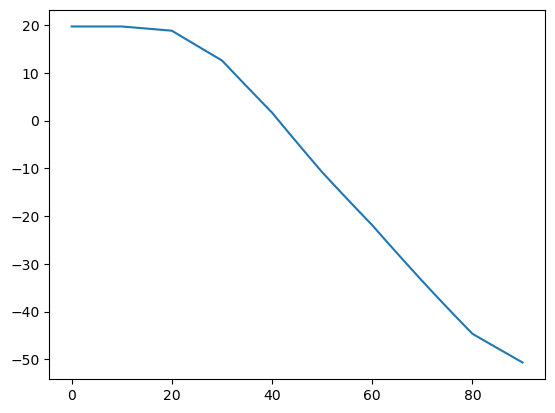

In [4]:
plt.plot(lat, end)

Text(0.5, 0, 'Latitude')

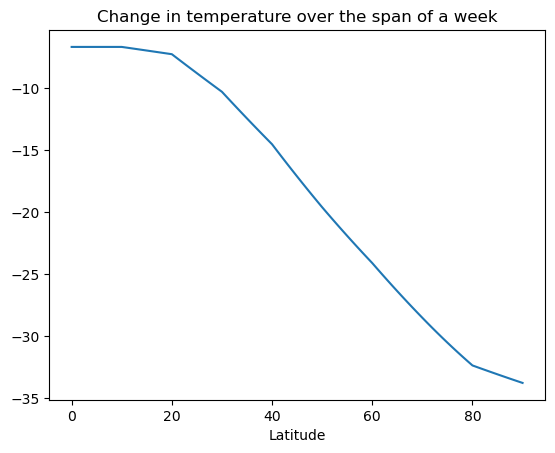

In [5]:
difference = end - initial
plt.plot(lat, difference)
plt.title('Change in temperature over the span of a week')
plt.xlabel('Latitude')